In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [3]:
# Generating the Input Signal and its Sampled Version
fm=100
fs=50*fm
A_m=5
t=np.arange(0,0.001+2/fm,0.0001)
ts=np.arange(0,2/fs+2/fm,1/fs)

In [4]:
y=A_m*np.sin(2*np.pi*fm*t)
ys=A_m*np.sin(2*np.pi*fm*ts)

In [5]:
delta=A_m*2*np.pi*fm*(1/fs)
print(delta)

0.6283185307179586


In [6]:
#Generating values of error, quantized error and quantized input
e=np.zeros(len(ts))
eq=np.zeros(len(ts))
mq=np.zeros(len(ts))

for i in range(0,len(ts)):
    if i==0:
        e[i]=ys[i]
        eq[i]=delta*np.sign(e[i])
        mq[i]=eq[i]
    else:
        e[i]=ys[i]-mq[i-1]
        eq[i]=delta*np.sign(e[i])
        mq[i]=eq[i]+mq[i-1]

In [16]:
Mq = []
for i in mq:
    for j in range(M):
        Mq.append(i)


NameError: name 'M' is not defined

In [8]:
m_rec=[]
for i in range(0,len(ts)):
    m_rec.append(e[i-1]+mq[i-1])

In [9]:
#Smoothing of the reconstructed signal using Butterworth Low Pass Filter
[b,a]=signal.butter(3,(1/fm)*0.005,fs=0.0005)
rec=signal.lfilter(b,a,mq)

Text(0, 0.5, 'Amplitude')

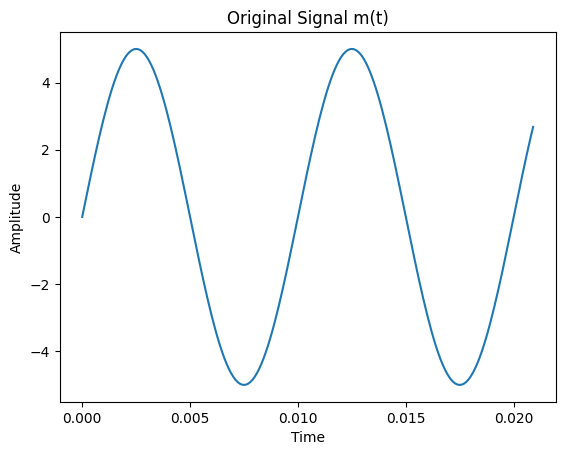

In [10]:
plt.plot(t,y)
plt.title("Original Signal m(t)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

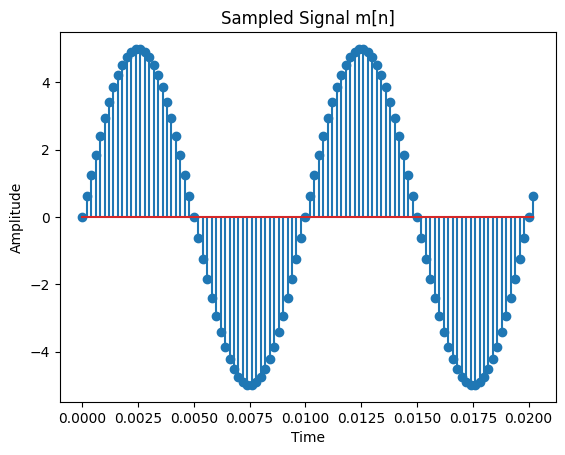

In [11]:
plt.stem(ts,ys)
plt.title("Sampled Signal m[n]")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

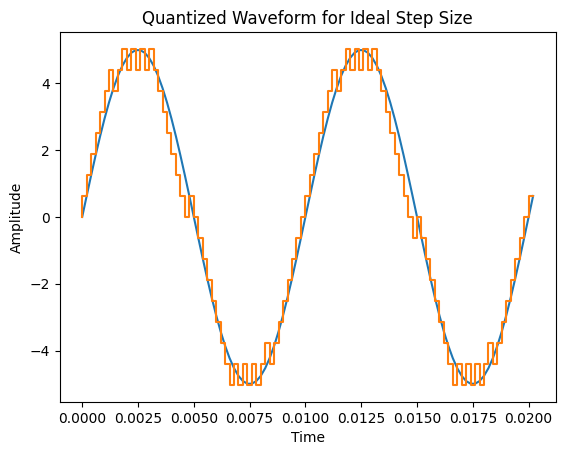

In [12]:
plt.plot(ts,ys)
plt.step(ts,mq)
plt.title("Quantized Waveform for Ideal Step Size")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

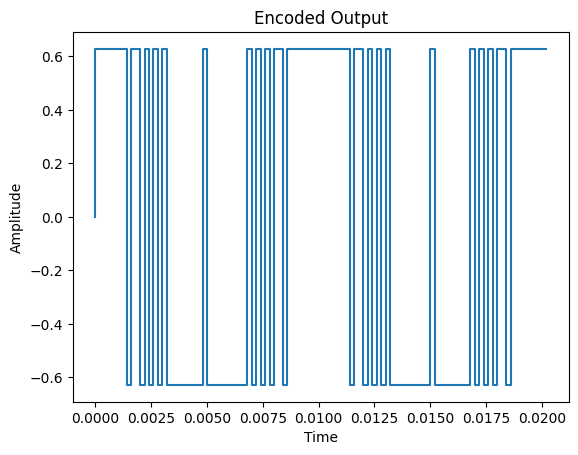

In [13]:
plt.step(ts,eq)
plt.title("Encoded Output")
plt.xlabel("Time")
plt.ylabel("Amplitude")


Text(0, 0.5, 'Amplitude')

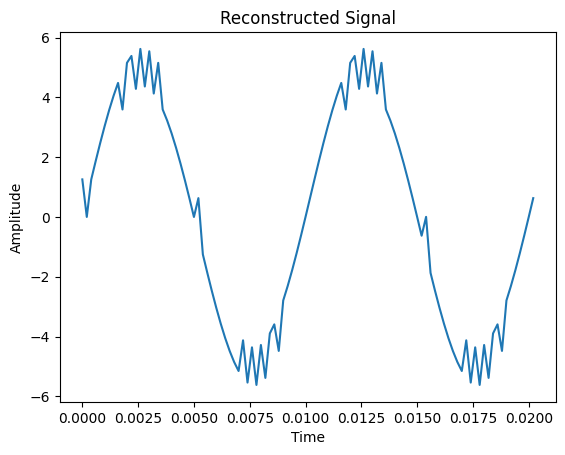

In [14]:
plt.plot(ts,m_rec)
plt.title("Reconstructed Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

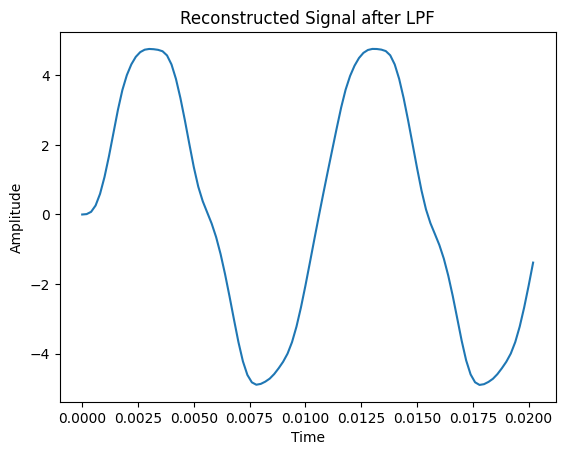

In [15]:
plt.plot(ts,rec)
plt.title("Reconstructed Signal after LPF")
plt.xlabel("Time")
plt.ylabel("Amplitude")